In [1]:
#calcZ.ipynb
from numpy import *
import numpy as np
#from bhmief import *
import pytmatrix.refractive
wl=[pytmatrix.refractive.wl_Ku,pytmatrix.refractive.wl_Ka,pytmatrix.refractive.wl_W]

mw1= pytmatrix.refractive.m_w_0C[wl[0]]
mw2= pytmatrix.refractive.m_w_0C[wl[1]]
mw3= pytmatrix.refractive.m_w_0C[wl[2]]

sback13w=[]
sback37w=[]
sback95w=[]
nang=20

dbinsM=(0.025+arange(300)*0.05)
massW=(0.1*dbinsM)**3/6.*pi
dMax=10.*(massW/0.0061)**(1/2.05)
print(wl)


[22.0, 8.43, 3.19]


In [2]:

freqs=['13.8','35.00','94.00','183.31', '325.15','660.00','684.00']
wlL=[]
for f in freqs:
    ff=float(f)
    wlf=300./ff
    print(wlf)
    wlL.append(wlf)

#mw_all=[pytmatrix.refractive.m_w_0C[wl] for wl in wlL]
print(dir(pytmatrix.refractive))

21.73913043478261
8.571428571428571
3.1914893617021276
1.6365719273362065
0.922651084115024
0.45454545454545453
0.43859649122807015
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'bruggeman_refractive', 'ice_density', 'ice_refractive', 'interpolate', 'm_w_0C', 'm_w_10C', 'm_w_20C', 'mg_refractive', 'mi', 'module_path', 'np', 'path', 'wl_C', 'wl_Ka', 'wl_Ku', 'wl_S', 'wl_W', 'wl_X']


In [3]:
from bhmief import *
mi1= pytmatrix.refractive.mi(wl[0],0.92)
mi2= pytmatrix.refractive.mi(wl[1],0.92)
mi3= pytmatrix.refractive.mi(wl[2],0.92)
m=np.array([mi1,mi2,mi3])

K2=0.93
kextw_13=[]
kextw_37=[]
kextw_95=[]
dbinsM=np.arange(50)*0.2+0.1

for i,d in enumerate(dbinsM):
    x=d*pi/wl[0]
    s1,s2,qext13w,qsca13w,qback13w,gsca13w=bhmie(x,mw1,nang)
    sback13w.append(qback13w*d**2*pi/4.*wl[0]**4/pi**5) ## mm^6
    kextw_13.append(qext13w*d**2*pi/4.) ##mm^2
    x=d*pi/wl[1]
    s1,s2,qext37w,qsca37w,qback37w,gsca37w=bhmie(x,mw2,nang)
    sback37w.append(qback37w*(d)**2*pi/4.*wl[1]**4/pi**5)
    kextw_37.append(qext37w*d**2*pi/4.) ##mm^2
    x=d*pi/wl[2]
    s1,s2,qext95w,qsca95w,qback95w,gsca95w=bhmie(x,mw3,nang)
    sback95w.append(qback95w*(d)**2*pi/4.*wl[2]**4/pi**5)
    kextw_95.append(qext95w*d**2*pi/4.) ##mm^2

sback13w=array(sback13w)
sback37w=array(sback37w)
sback95w=array(sback95w)
kextw_13=array(kextw_13)
kextw_37=array(kextw_37)
kextw_95=array(kextw_95)


0.02174 13.8 21.740000694990158
0.00857 35.00 8.569999597966671
0.00319 94.00 3.1900000758469105
0.00164 183.31 1.6400000313296914
0.00092 325.15 0.9200000204145908
0.00045 660.00 0.44999999227002263
0.00044 684.00 0.4400000034365803
(5, 25, 200)


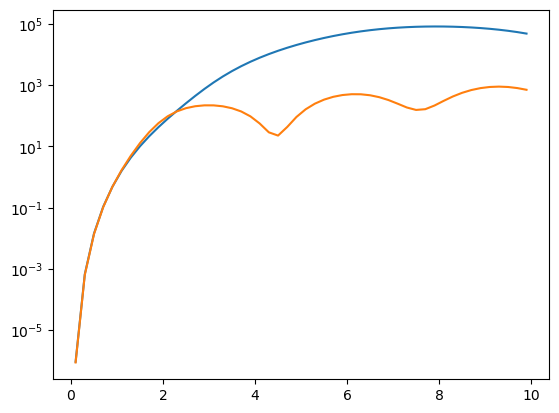

In [8]:
import matplotlib.pyplot as plt
import netCDF4 as nc
plt.semilogy(dbinsM,sback13w)
plt.semilogy(dbinsM,sback37w)
freqs=['13.8','35.00','94.00','183.31','325.15','660.00','684.00']
kextL=[]
bscatL=[]
kscaL=[]
gL=[]
dmL=[]
for f in freqs[:]:
    fh=nc.Dataset('SSP/ice-self-similar-aggregates_%s-GHz_scat.nc'%f)
    mass= fh['mass'][:]
    dm= fh['mean_dimension'][:]
    ext= fh['ext'][:]
    scat= fh['scat'][:]
    g= fh['g'][:]
    bscat= fh['bscat'][:]

    wavelength= fh['wavelength'][:]
    wl_srg=wavelength*1e3
    # get the diamter from the mass assuming a density of 1000 kg/m^3
    rhow=1000.
    d=(6*mass/pi/rhow)**(1/3.)*1e3 # mm
    bscat=bscat*4*pi*wl_srg**4/pi**5*1e6    # mm^6
    kext=ext*1e6
    ksca=scat*1e6    
    #print(fh['bscat'])
    #print(fh)
    print(wavelength,f,wl_srg)
    kextL.append(kext[3,:])
    bscatL.append(bscat[3,:])
    kscaL.append(ksca[3,:])
    gL.append(g[3,:])
    dmL.append(d[:])
    #break

print(bscat.shape)
plt.semilogy(d[50:],bscat[3,50:])
plt.semilogy(d[50:],d[50:]**6)

In [7]:
print(bscat.shape)
print(fh['bscat'])

(5, 25, 200)
<class 'netCDF4._netCDF4.Variable'>
float32 bscat(temperature, fraction, size)
    units: m2 sr-1
    long_name: Backscatter cross-section
    comment: This is the backscatter cross-section for zenith or nadir incidence. Note that this
variable is defined such that if the particle with backscatter cross-section B is
illuminated by radiation from a particular direction with intensity F W/m2, then the
power scattered into the backwards direction per steradian will be F*B W/sterad.
Multiply this variable by 4pi to obtain the radar cross-section.
unlimited dimensions: 
current shape = (5, 25, 200)
filling on, default _FillValue of 9.969209968386869e+36 used


In [9]:
dmL=array(dmL)
kextL=array(kextL)
bscatL=array(bscatL)
kscaL=array(kscaL)
gL=array(gL)
print(dmL.shape)
print(kextL.shape)
print(bscatL.shape)
print(kscaL.shape)
print(gL.shape)

(7, 25, 200)
(7, 25, 200)
(7, 25, 200)
(7, 25, 200)
(7, 25, 200)


In [10]:

import xarray as xr
dmX=xr.DataArray(dmL,dims=['freq','fract','size'])
kextX=xr.DataArray(kextL,dims=['freq','fract','size'])
bscatX=xr.DataArray(bscatL,dims=['freq','fract','size'])
kscaX=xr.DataArray(kscaL,dims=['freq','fract','size'])
gX=xr.DataArray(gL,dims=['freq','fract','size'])
freqX=xr.DataArray([float(freq) for freq in freqs],dims=['freq'])
dmX.attrs['units']='mm'
kextX.attrs['units']='mm^2'
bscatX.attrs['units']='mm^6'
kscaX.attrs['units']='mm^2'
gX.attrs['units']=''
ds=xr.Dataset({'dm':dmX,'kext':kextX,'bscat':bscatX,'ksca':kscaX,'g':gX,'freq':freqX})


ds.to_netcdf('ice_SSRG_SSP.nc')

In [25]:
rhow=1 #gcm-3
dD=0.05
from scipy.special import gamma as gam
mu=2.0
Dint=np.arange(260)*dD+dD/2.0
Deq=dm
rwc=(np.logspace(-4,1.25,300))
Nw=0.08e8
Dm=(4**4*rwc/(np.pi*1e6*Nw))**0.25*1e3 # in mm
f_mu=6/4**4*(4+mu)**(mu+4)/gam(mu+4)
lambd=(4+mu)/Dm
zAllL=[]
kextAllL=[]
kscaAllL=[]
gAllL=[]
ifract=4
for bsca1,ext1,scat1,g1 in zip(bscatL,kextL,kscaL,gL):
    Deq=dmL[0][ifract]
    bscatInt=np.exp(np.interp(Dint,Deq,np.log(bsca1[ifract])))  #mm^6
    extInt=np.exp(np.interp(Dint,Deq,np.log(ext1[ifract])))     #mm^2
    scatInt=np.exp(np.interp(Dint,Deq,np.log(scat1[ifract])))   #mm^2
    gInt=np.interp(Dint,Deq,(g1[ifract]))  #dimensionless
    massW=np.pi/6*(Dint*0.1)**3*rhow
    mL=[]
    zTrueL=[]
    kextfL=[]
    kscatfL=[]
    gfL=[]
    for lambd1,dm1 in zip(lambd,Dm):
        Nd=f_mu*np.exp(-lambd1*Dint)*(Dint/dm1)**mu*dD #(mm)
        M=sum(Nd*massW*Nw*1e-3)
        zTrue=log10(sum(Nw*1e-3*Nd*bscatInt/K2)+1e-9)*10.
        kext=sum(Nd*Nw*1e-3*extInt)*1e-3
        kscat=sum(Nd*Nw*1e-3*scatInt)*1e-3
        g1=sum(Nd*Nw*1e-3*scatInt*gInt)*1e-3/kscat
        mL.append(M)
        zTrueL.append(zTrue)
        kextfL.append(kext)
        kscatfL.append(kscat)
        gfL.append(g1)
    zAllL.append(zTrueL)
    kextAllL.append(kextfL)
    kscaAllL.append(kscatfL)
    gAllL.append(gfL)
    #break


(25, 200)
(7, 25, 200)
['Dataset', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'getBBProp', 'getGraupProp', 'getRainProp', 'getSnowProp', 'scattTables']


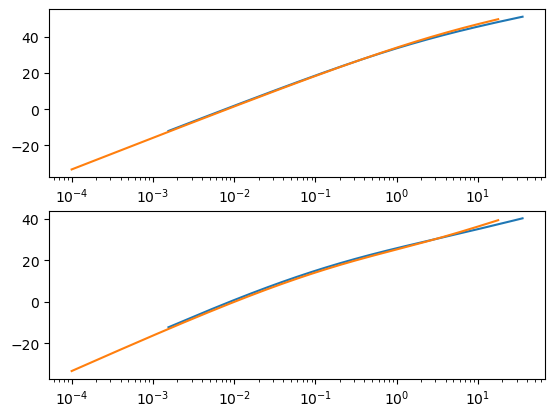

In [26]:
print(bsca1.shape)
print(dmL.shape)
#plt.subplot(111)
zAllL=array(zAllL)
#plt.semilogx(mL,zAllL[0])
import lkTables as lkt
print(dir(lkt))
lkTables=lkt.scattTables()
#plt.semilogx(lkTables.rwc,lkTables.zKuR)
plt.figure()
plt.subplot(211)
plt.semilogx(lkTables.swc,lkTables.zKuS)
plt.semilogx(mL,zAllL[0])
plt.subplot(212)
plt.semilogx(lkTables.swc,lkTables.zKaS)
plt.semilogx(mL,zAllL[1])
#plt.semilogx(mL,np.array(kextfL)*4.343)
#plt.subplot(212)
#plt.plot(mL,gfL)

In [27]:
zAllX=xr.DataArray(zAllL,dims=['freq','rwc'])
kextAllX=xr.DataArray(kextAllL,dims=['freq','rwc'])
kscaAllX=xr.DataArray(kscaAllL,dims=['freq','rwc'])
gAllX=xr.DataArray(gAllL,dims=['freq','rwc'])
rwcX=xr.DataArray(rwc,dims=['rwc'])
dmX=xr.DataArray(Dm,dims=['rwc'])
freqX=xr.DataArray([float(freq) for freq in freqs],dims=['freq'])
zAllX.attrs['units']='dBZ'
kextAllX.attrs['units']='1/km'
kscaAllX.attrs['units']='1/km'
gAllX.attrs['units']=''
rwcX.attrs['units']='g/m^3'
dmX.attrs['units']='mm'
ds=xr.Dataset({'dm':dmX,'kext':kextAllX,'bscat':kscaAllX,'ksca':kscaAllX,'g':gAllX,'rwc':rwcX,'freq':freqX})
ds.to_netcdf('ice_SSRG_integrated_prop.nc')